In [15]:
import pandas as pd
from matplotlib import pyplot, dates
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
path_train = './New_train_data.csv'
train = pd.read_csv(path_train)

In [3]:
train

,DateTime,X1,X2,X3,X4,Y
0,2021/12/31 23:00,2.186333,13.76,0.0663,0.1547,5.211638e+05
1,2022/01/01 0:00,12.087667,84.86,0.4914,0.7410,2.494531e+06
2,2022/01/01 1:00,10.903667,87.28,0.4719,0.8775,2.117415e+06
3,2022/01/01 2:00,10.145333,88.58,0.4862,1.0231,1.873545e+06
4,2022/01/01 3:00,9.870000,86.06,0.4381,1.1336,1.766122e+06
...,...,...,...,...,...,...
6985,2022/10/19 0:00,35.403333,105.24,0.6188,0.8281,2.454735e+06
6986,2022/10/19 1:00,34.956667,105.42,0.4901,0.9243,2.323497e+06
6987,2022/10/19 2:00,34.866667,105.70,0.6019,0.8957,2.241004e+06
6988,2022/10/19 3:00,35.326667,105.88,0.6591,0.9802,2.206828e+06


### Data Prepartion

In [4]:
# parsing to datetime
train['DateTime'] = pd.to_datetime(train['DateTime'])

In [5]:
train.dtypes

DateTime    datetime64[ns]
X1                 float64
X2                 float64
X3                 float64
X4                 float64
Y                  float64
dtype: object

In [6]:
train['DateTime'] = train['DateTime'].dt.to_period('s')

In [7]:
train.set_index(train['DateTime'],inplace=True)

In [8]:
# DateTime changed into the index
train_idx = train[['X1', 'X2', 'X3', 'X4', 'Y']]

In [9]:
# Extracting only Y
train_w_y = train_idx[['Y']]

### Autocorrelation plot

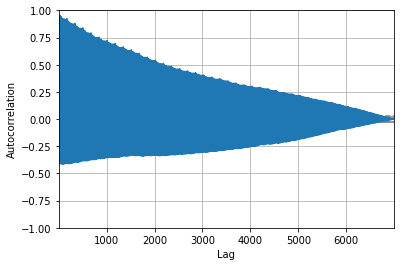

In [13]:
autocorrelation_plot(train_w_y)

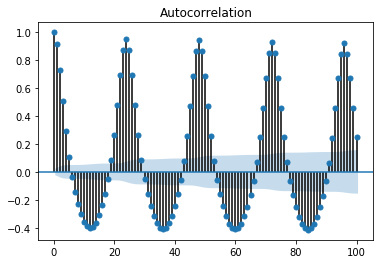

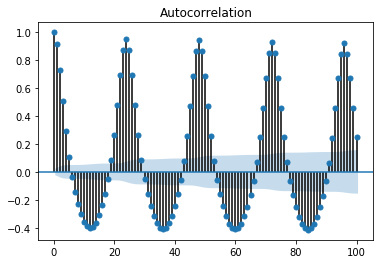

In [19]:
plot_acf(train_w_y, lags=100)